In [1]:
import torch

In [5]:
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
TORCH_VERSION

'1.11'

# Used an already trained model to test Detectron2

We will download an image and test it on it.

In [12]:
# Import packages
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
# In order to show image
from matplotlib import pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [36]:
def show_image(img):
    f = plt.figure()
    f.set_figwidth(60)
    f.set_figheight(20)
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Converts from one colour space to the other
    plt.xticks([]), plt.yticks([])
    plt.imshow(img2)

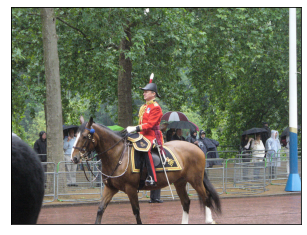

In [21]:
#!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg

img = cv2.imread('./input.jpg', 1)

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Converts from one colour space to the other
plt.xticks([]), plt.yticks([])
plt.imshow(img2)

In [28]:
cfg = get_cfg()
# In order to run in CPU this configuration is needed
cfg.MODEL.DEVICE = 'cpu'

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(img)

In [30]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([17,  0,  0,  0,  0,  0,  0,  0, 25,  0, 25, 25,  0,  0, 24])
Boxes(tensor([[126.6035, 244.8977, 459.8291, 480.0000],
        [251.1083, 157.8127, 338.9731, 413.6379],
        [114.8496, 268.6864, 148.2351, 398.8111],
        [  0.8217, 281.0327,  78.6072, 478.4209],
        [ 49.3953, 274.1229,  80.1545, 342.9808],
        [561.2248, 271.5816, 596.2755, 385.2552],
        [385.9072, 270.3125, 413.7130, 304.0397],
        [515.9295, 278.3743, 562.2792, 389.3803],
        [335.2410, 251.9167, 414.7491, 275.9375],
        [350.9300, 269.2060, 386.0984, 297.9081],
        [331.6292, 230.9996, 393.2759, 257.2009],
        [510.7349, 263.2656, 570.9865, 295.9194],
        [409.0841, 271.8646, 460.5582, 356.8722],
        [506.8767, 283.3257, 529.9403, 324.0392],
        [594.5663, 283.4820, 609.0577, 311.4124]]))


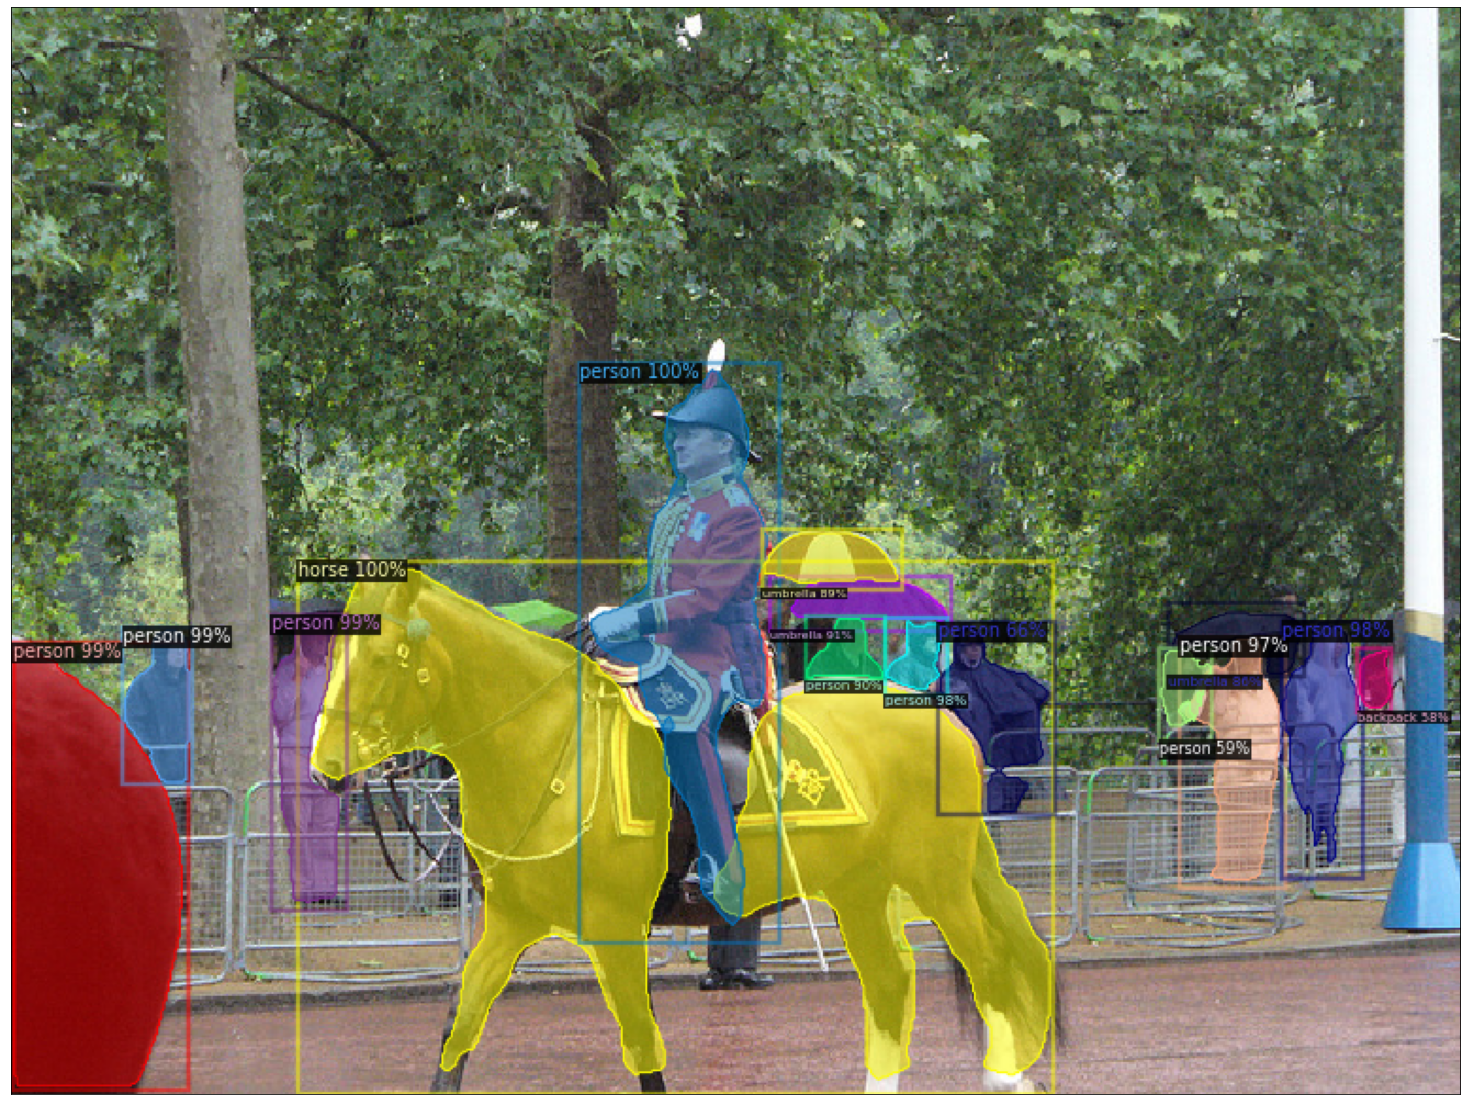

In [38]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
show_image(out.get_image()[:, :, ::-1])

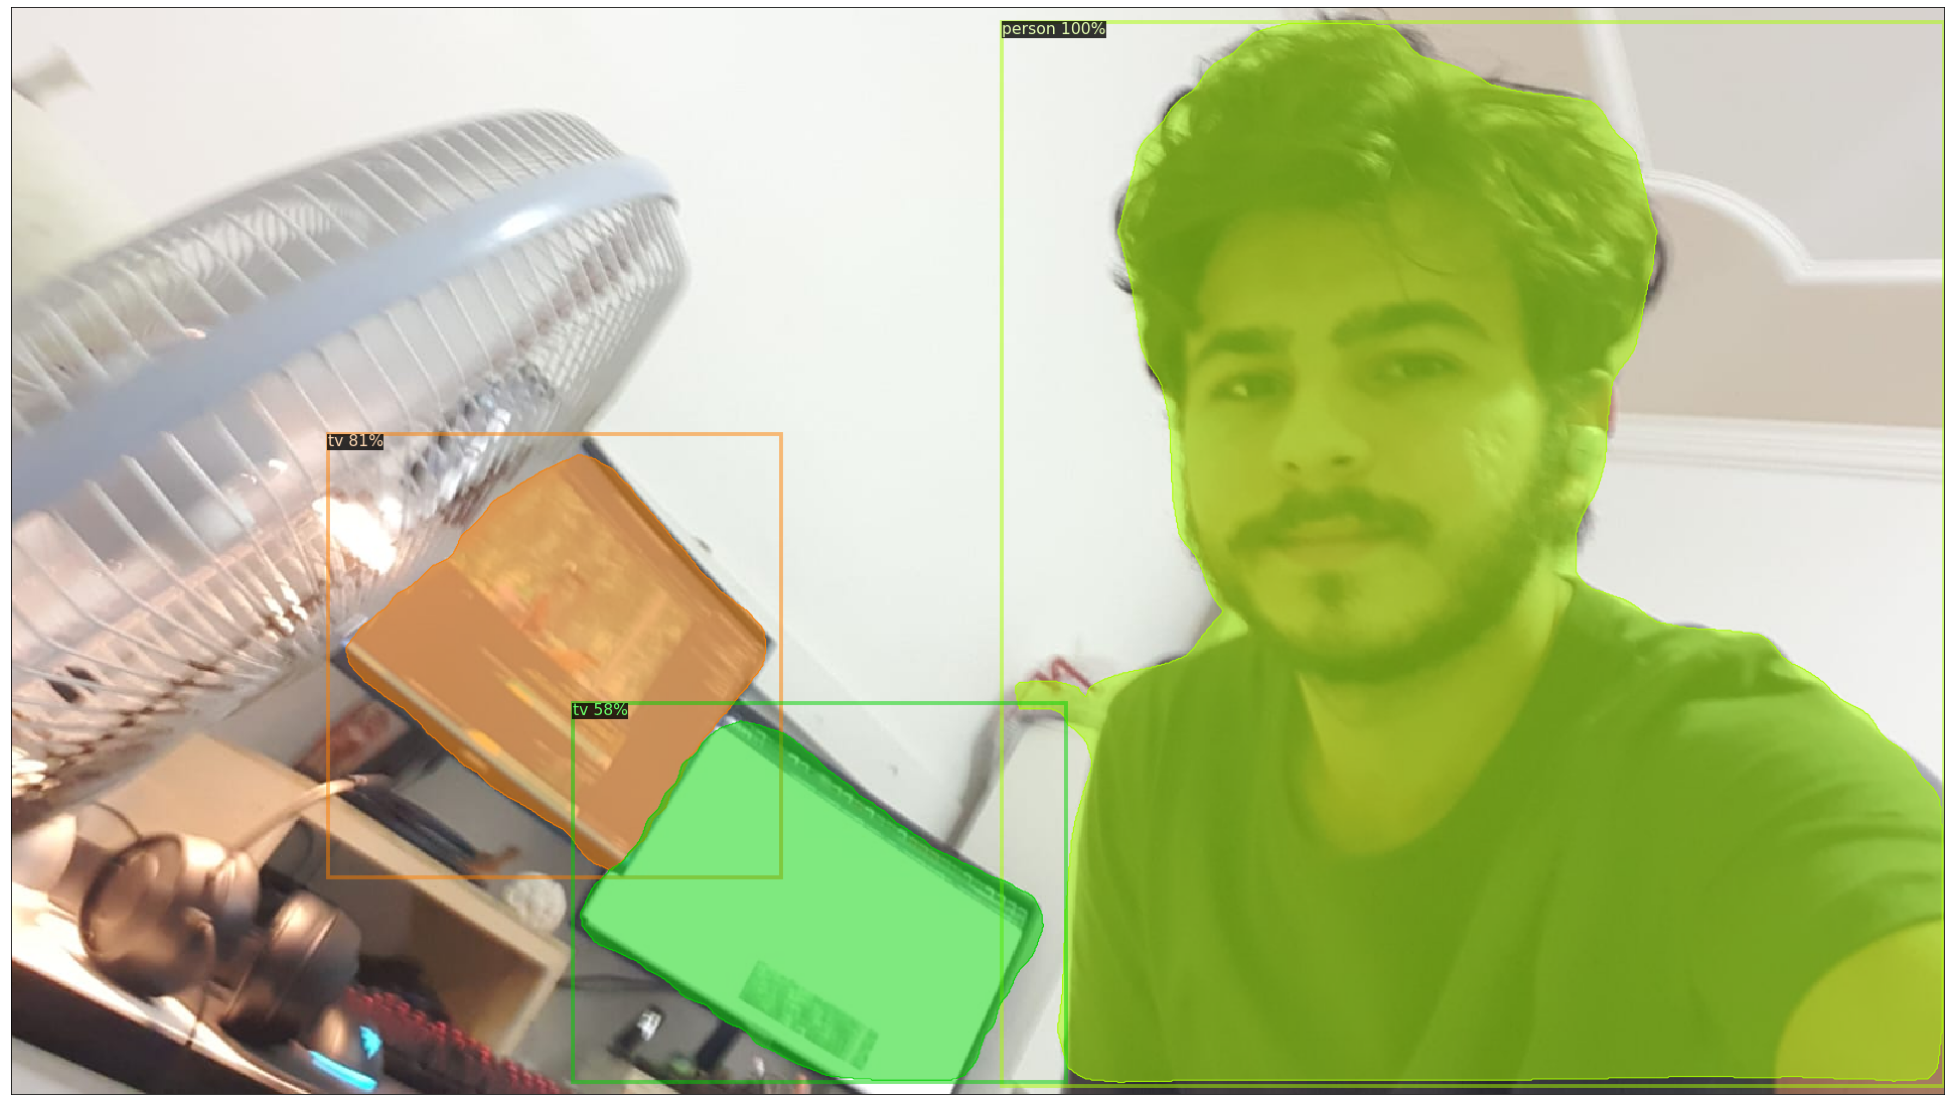

In [41]:
# Predict my image
imt = cv2.imread('./teste_encontrar.jpeg')
tpredictor = DefaultPredictor(cfg)
tout = tpredictor(imt)

# We can use `Visualizer` to draw the predictions on the image.
vt = Visualizer(imt[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
outt = vt.draw_instance_predictions(tout["instances"].to("cpu"))
show_image(outt.get_image()[:, :, ::-1])

In [ ]:
# This is segmentation.